In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import math
import os

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# 0. utilities

random_state = 1

plt_properties = {
    "color": [
        "#00b894",
        "#0984e3",
        "#6c5ce7",
        "#d63031",
        "#fdcb6e",
        "#e84393",
        "#81ecec",
        "#a29bfe",
        "#fab1a0",
        "#636e72",
    ],
    "marker": ["*", "o", "s", "^", ".", "D", "v", "x"],
    "markersize": [16, 10, 10, 10, 10, 10, 10, 10],
}

In [3]:
# 1. data preprocessing
df_origin = pd.read_csv('car_price.csv')
df_origin.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_origin.info() # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
# 1.1 object columns
df_object = df_origin.select_dtypes(include=['object']).drop(columns=['CarName'])
for col in df_object.columns:
    print(f'{col}: {df_object[col].unique()}')

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
doornumber: ['two' 'four']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [6]:
# 1.2 numerical columns
df_num = df_origin.select_dtypes(include=['int64', 'float64']).drop(columns=['car_ID'])

# cylindernumber column in df_object can be converted to numerical
enc_cylindernumber = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df_object['cylindernumber'] = df_object['cylindernumber'].map(enc_cylindernumber)
df_num['cylindernumber'] = df_object['cylindernumber'].astype(int)
df_object.drop(columns=['cylindernumber'], inplace=True)

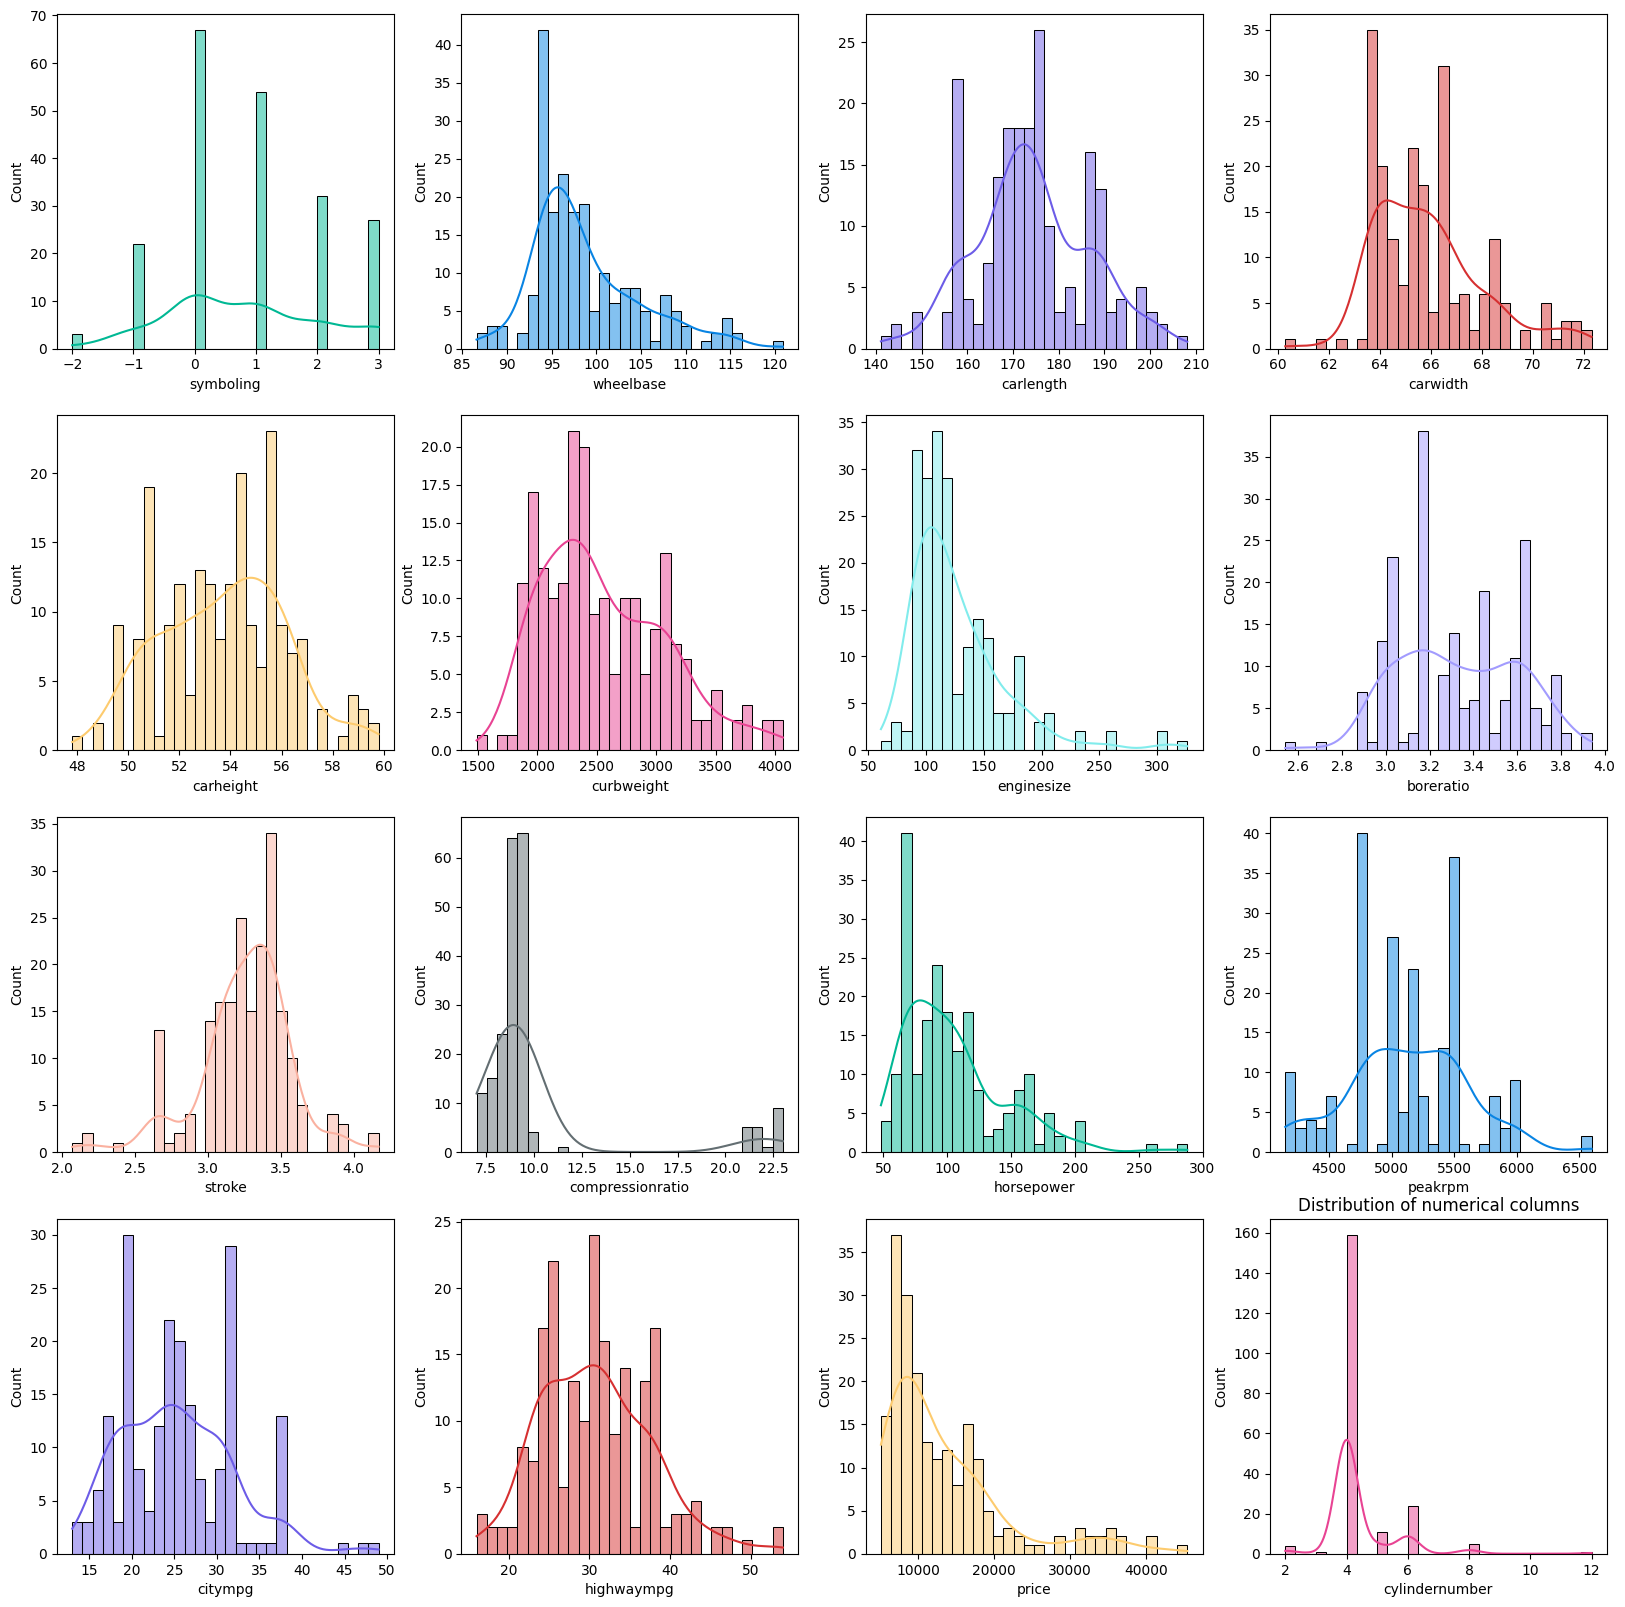

In [7]:
# distribution of numerical columns
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col], kde=True, bins=30, ax=axes[i//4, i%4], color=plt_properties['color'][i % len(plt_properties['color'])])
plt.title('Distribution of numerical columns')
plt.show()

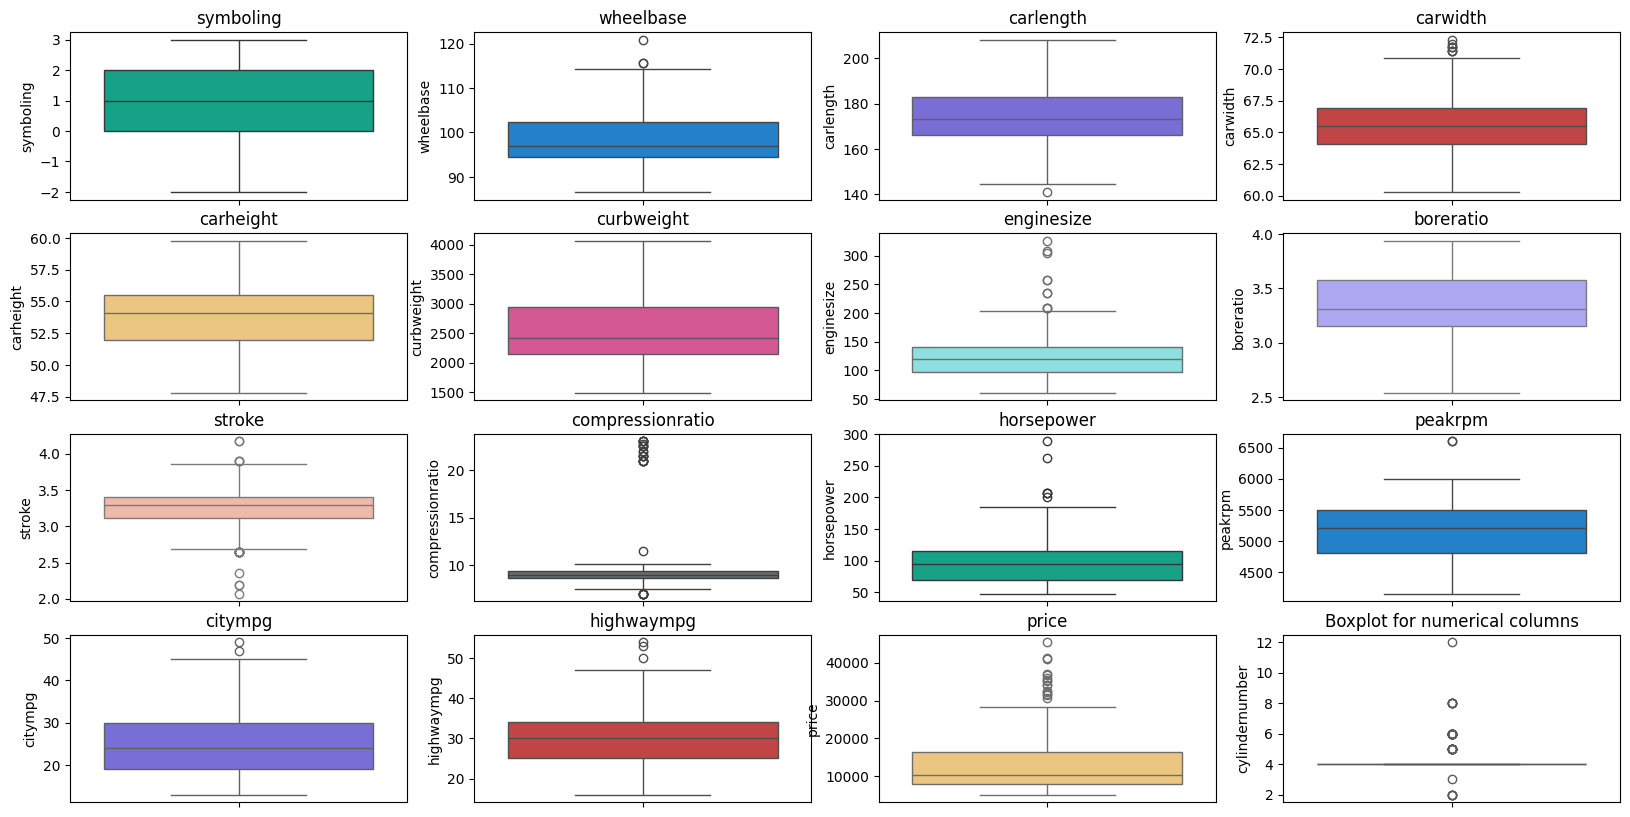

In [8]:
# boxplot for numerical columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(df_num.columns):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(df_num[col], ax=ax, color=plt_properties['color'][i % len(plt_properties['color'])])
    plt.title(col)
plt.title('Boxplot for numerical columns')
plt.show()

In [9]:
# outlier processing
# TODO

In [10]:
# normalize numerical columns
# TODO: standardize? min-max?
# scaler = StandardScaler()
scaler = MinMaxScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

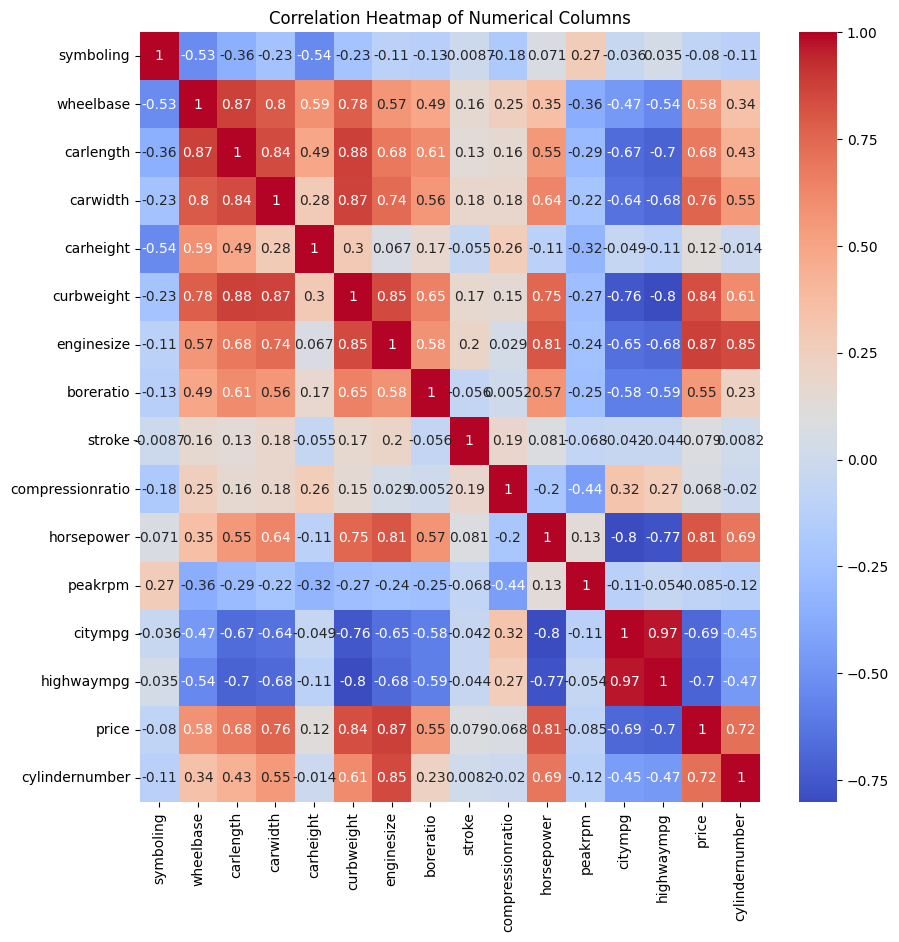

In [11]:
# heapmap
plt.figure(figsize=(10, 10))
sns.heatmap(df_num_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [12]:
# drop or merge highly correlated columns
# TODO
df_num_scaled.drop(columns=['carlength', 'carwidth', 'enginesize', 'citympg'], inplace=True)

In [13]:
# 1.3 carName column 
df_carName = df_origin['CarName']
print(df_carName.str.split(' ', expand=True)[0].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'volkswagen' 'volvo']


In [14]:
# car_company column for df_object
car_company = []
for name in df_origin['CarName']:
    car_company.append(name.split()[0])

replace_dict = {
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
}

for i, name in enumerate(car_company):
    if name in replace_dict.keys():
        car_company[i] = replace_dict[name]
        
df_object['car_company'] = car_company

In [15]:
# 1.4 one-hot encoding for df_object
# TODO: one-hot? label encoding?
df_object_encoded = pd.get_dummies(df_object, drop_first=True)

In [16]:
# 1.5 merge all columns
df_preprocessed = pd.concat([df_num_scaled, df_object_encoded], axis=1)
df_preprocessed.info()
print(df_preprocessed.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    float64
 1   wheelbase               205 non-null    float64
 2   carheight               205 non-null    float64
 3   curbweight              205 non-null    float64
 4   boreratio               205 non-null    float64
 5   stroke                  205 non-null    float64
 6   compressionratio        205 non-null    float64
 7   horsepower              205 non-null    float64
 8   peakrpm                 205 non-null    float64
 9   highwaympg              205 non-null    float64
 10  price                   205 non-null    float64
 11  cylindernumber          205 non-null    float64
 12  fueltype_gas            205 non-null    bool   
 13  aspiration_turbo        205 non-null    bool   
 14  doornumber_two          205 non-null    bo

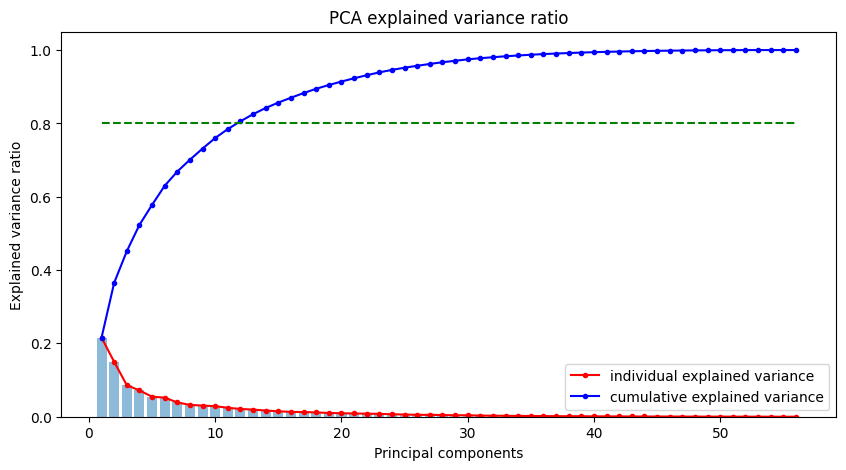

In [17]:
# 2. dimensionality reduction
# 2.1 PCA
pca_test = PCA(n_components = None, random_state=random_state)
df_pca_test = pca_test.fit_transform(df_preprocessed)
ratio = pca_test.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(ratio)+1), ratio, alpha=0.5, align='center')
plt.plot(range(1, len(ratio)+1), ratio, 'r.-', label='individual explained variance')
plt.plot(range(1, len(ratio)+1), np.cumsum(ratio), 'b.-', label='cumulative explained variance')
plt.plot(range(1, len(ratio)+1), 0.8*np.ones(len(ratio)), 'g--')
plt.title('PCA explained variance ratio')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [18]:
pca = PCA(n_components=16, random_state=random_state) # > 80% explained variance
df_pca = pca.fit_transform(df_preprocessed)
pca.explained_variance_ratio_.sum()

0.869960502810728

In [19]:
df_pca = pd.DataFrame(df_pca, columns=[f'pca_{i+1}' for i in range(len(df_pca[0]))])
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pca_1   205 non-null    float64
 1   pca_2   205 non-null    float64
 2   pca_3   205 non-null    float64
 3   pca_4   205 non-null    float64
 4   pca_5   205 non-null    float64
 5   pca_6   205 non-null    float64
 6   pca_7   205 non-null    float64
 7   pca_8   205 non-null    float64
 8   pca_9   205 non-null    float64
 9   pca_10  205 non-null    float64
 10  pca_11  205 non-null    float64
 11  pca_12  205 non-null    float64
 12  pca_13  205 non-null    float64
 13  pca_14  205 non-null    float64
 14  pca_15  205 non-null    float64
 15  pca_16  205 non-null    float64
dtypes: float64(16)
memory usage: 25.8 KB


In [20]:
# 2.2 autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, encoding_dim),
            nn.BatchNorm1d(encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, input_dim),
            nn.BatchNorm1d(input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

c:\Users\Y\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/1000, Loss: 0.2509802281856537
Epoch 2/1000, Loss: 0.24492833018302917
Epoch 3/1000, Loss: 0.24711193144321442
Epoch 4/1000, Loss: 0.23705340921878815
Epoch 5/1000, Loss: 0.2274165004491806
Epoch 6/1000, Loss: 0.22389598190784454
Epoch 7/1000, Loss: 0.22296275198459625
Epoch 8/1000, Loss: 0.21586158871650696
Epoch 9/1000, Loss: 0.20916901528835297
Epoch 10/1000, Loss: 0.21070070564746857
Epoch 11/1000, Loss: 0.2041802555322647
Epoch 12/1000, Loss: 0.20139767229557037
Epoch 13/1000, Loss: 0.20330508053302765
Epoch 14/1000, Loss: 0.20114921033382416
Epoch 15/1000, Loss: 0.1996745616197586
Epoch 16/1000, Loss: 0.19838304817676544
Epoch 17/1000, Loss: 0.1989317387342453
Epoch 18/1000, Loss: 0.19684049487113953
Epoch 19/1000, Loss: 0.19214430451393127
Epoch 20/1000, Loss: 0.1911252737045288
Epoch 21/1000, Loss: 0.1928560435771942
Epoch 22/1000, Loss: 0.19206839799880981
Epoch 23/1000, Loss: 0.1872958391904831
Epoch 24/1000, Loss: 0.19252502918243408
Epoch 25/1000, Loss: 0.1888266950

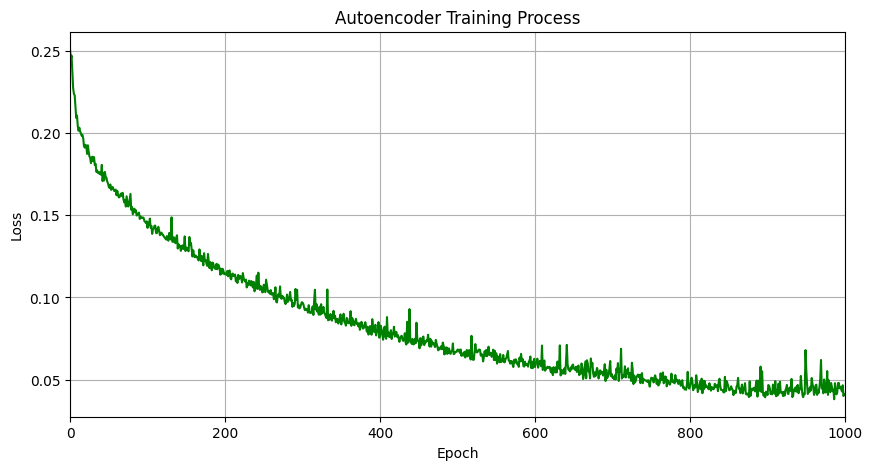

In [21]:
# training
input_dim = df_preprocessed.shape[1]
encoding_dim = 16
num_epochs = 1000
batch_size = 128
learning_rate = 1e-3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Autoencoder(input_dim, encoding_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

tensor_preprocessed = torch.tensor(df_preprocessed.astype('float64').values, dtype=torch.float).to(device)
train_loader = torch.utils.data.DataLoader(tensor_preprocessed, batch_size=batch_size, shuffle=True)

loss_values = []
for epoch in range(num_epochs):
    for data in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, data)
        loss.backward()
        optimizer.step()
    loss_values.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), loss_values, 'g-')
plt.title('Autoencoder Training Process')
plt.xlim(0, num_epochs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [22]:
# inference
model.eval()
df_autoencoder = model.encoder(tensor_preprocessed).detach().cpu().numpy()
df_autoencoder = pd.DataFrame(df_autoencoder, columns=[f'autoencoder_{i+1}' for i in range(encoding_dim)])
df_autoencoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   autoencoder_1   205 non-null    float32
 1   autoencoder_2   205 non-null    float32
 2   autoencoder_3   205 non-null    float32
 3   autoencoder_4   205 non-null    float32
 4   autoencoder_5   205 non-null    float32
 5   autoencoder_6   205 non-null    float32
 6   autoencoder_7   205 non-null    float32
 7   autoencoder_8   205 non-null    float32
 8   autoencoder_9   205 non-null    float32
 9   autoencoder_10  205 non-null    float32
 10  autoencoder_11  205 non-null    float32
 11  autoencoder_12  205 non-null    float32
 12  autoencoder_13  205 non-null    float32
 13  autoencoder_14  205 non-null    float32
 14  autoencoder_15  205 non-null    float32
 15  autoencoder_16  205 non-null    float32
dtypes: float32(16)
memory usage: 12.9 KB


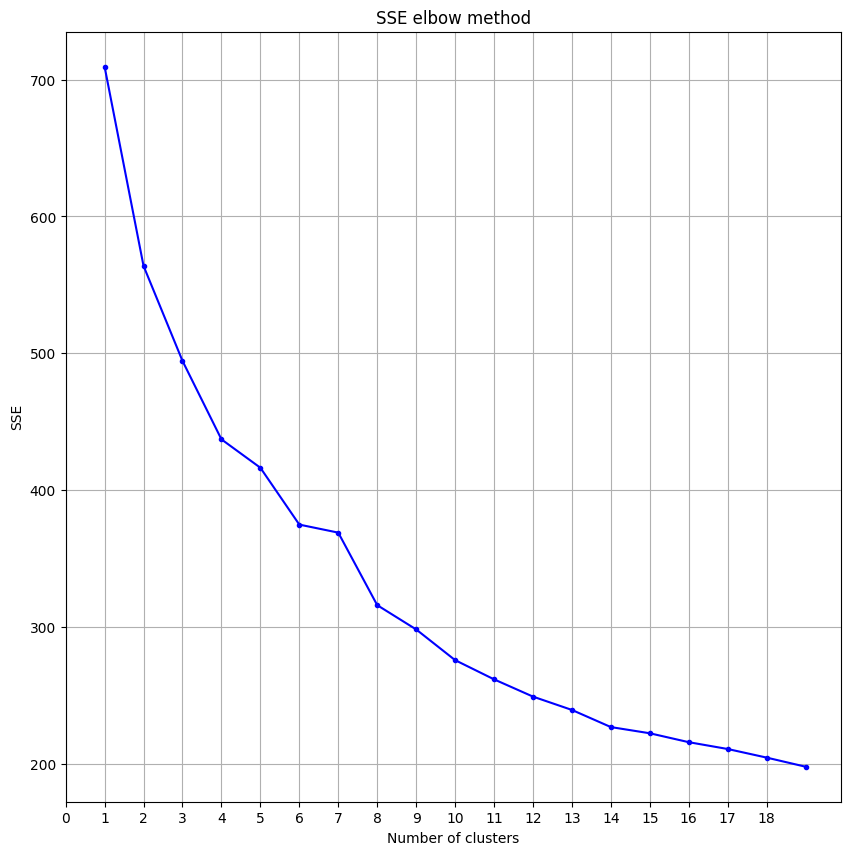

In [23]:
# 3. clustering
# 3.1 KMeans
# 3.1.1 PCA
# clustering with KMeans
# SSE elbow method
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 10))
plt.plot(range(1, 20), sse, 'b.-')
plt.title('SSE elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(len(sse)))
plt.grid()
plt.show()

In [24]:
kmeans = KMeans(n_clusters=6, random_state=random_state)
df_pca['kmeans'] = kmeans.fit_predict(df_pca)
df_pca['kmeans'].value_counts()

kmeans
1    60
2    48
0    39
5    26
3    20
4    12
Name: count, dtype: int64

c:\Users\Y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


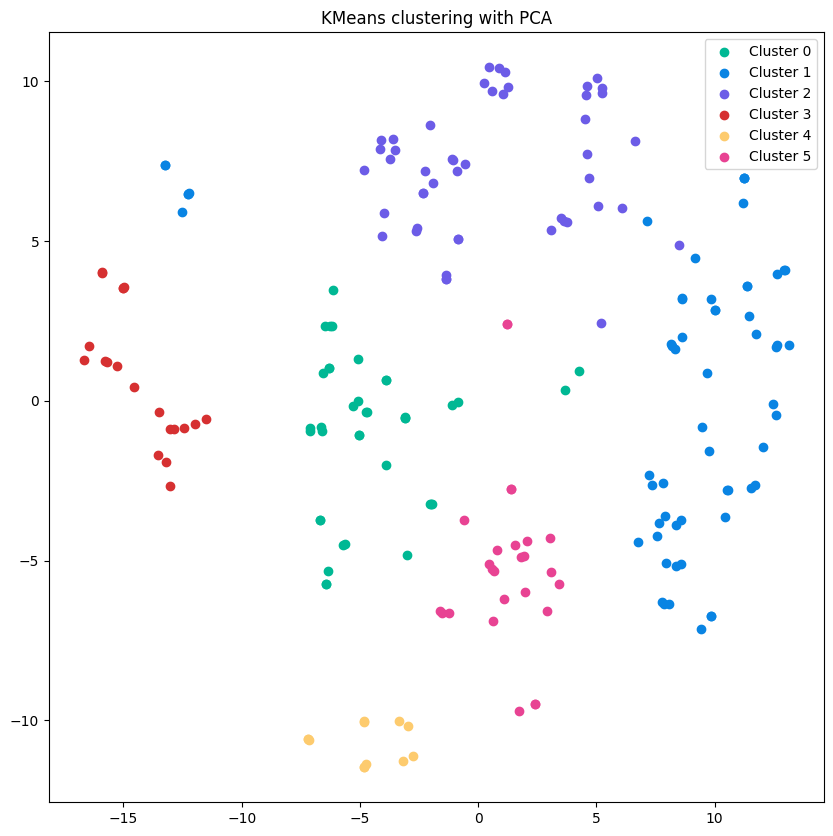

In [25]:
# evaluation
tsne_kmeans_pca = TSNE(n_components=2, random_state=random_state, perplexity=30, n_iter=1000).fit_transform(df_pca.drop(columns=['kmeans']))
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.scatter(tsne_kmeans_pca[df_pca['kmeans'] == i, 0], tsne_kmeans_pca[df_pca['kmeans'] == i, 1], 
                color=plt_properties['color'][i % len(plt_properties['color'])], label=f'Cluster {i}')
plt.title('KMeans clustering with PCA')
plt.legend()
plt.show()

In [26]:
silhouette_score_kmeans_pca = silhouette_score(df_pca.drop(columns=['kmeans']), df_pca['kmeans'])
calinski_harabasz_score_kmeans_pca = calinski_harabasz_score(df_pca.drop(columns=['kmeans']), df_pca['kmeans'])
davies_bouldin_score_kmeans_pca = davies_bouldin_score(df_pca.drop(columns=['kmeans']), df_pca['kmeans'])
print(f'Silhouette score: {silhouette_score_kmeans_pca}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score_kmeans_pca}')
print(f'Davies-Bouldin score: {davies_bouldin_score_kmeans_pca}') 

Silhouette score: 0.20628089590105084
Calinski-Harabasz score: 35.545840451759375
Davies-Bouldin score: 1.4617516808694113


In [27]:
#clustering with autoencoder
kmeans = KMeans(n_clusters=6, random_state=random_state)
df_autoencoder['kmeans'] = kmeans.fit_predict(df_autoencoder)
df_autoencoder['kmeans'].value_counts()

kmeans
2    140
3     34
0     15
4      8
1      5
5      3
Name: count, dtype: int64

c:\Users\Y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


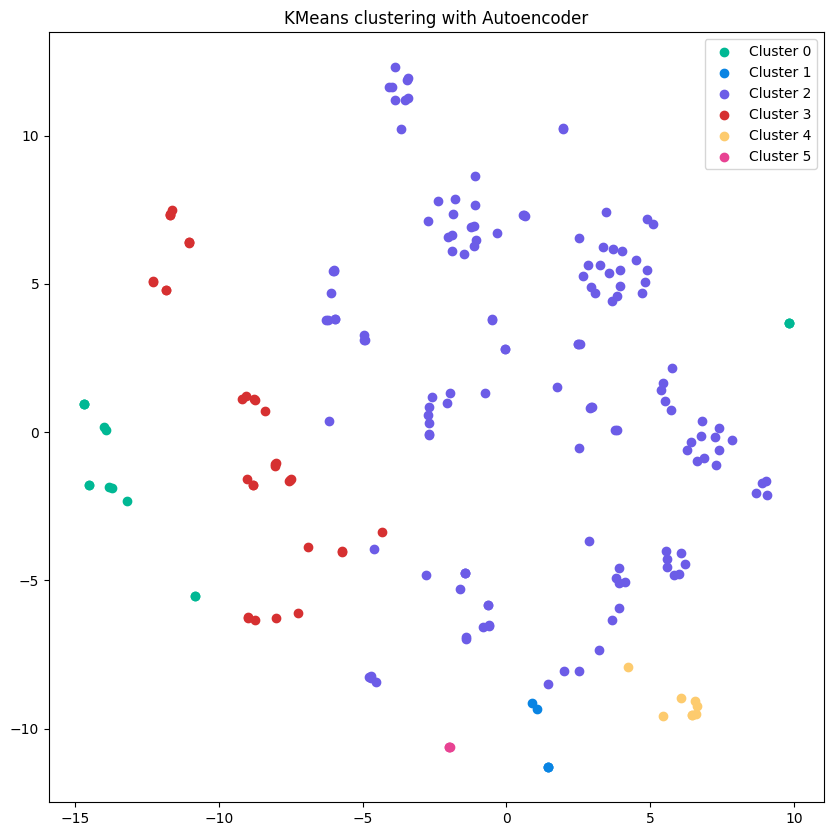

In [28]:
# evaluation
tsne_kmeans_autoencoder = TSNE(n_components=2, random_state=random_state, perplexity=30, n_iter=1000).fit_transform(df_autoencoder.drop(columns=['kmeans']))
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.scatter(tsne_kmeans_autoencoder[df_autoencoder['kmeans'] == i, 0], tsne_kmeans_autoencoder[df_autoencoder['kmeans'] == i, 1], 
                color=plt_properties['color'][i % len(plt_properties['color'])], label=f'Cluster {i}')
plt.title('KMeans clustering with Autoencoder')
plt.legend()
plt.show()

In [29]:
silhouette_score_kmeans_autoencoder = silhouette_score(df_autoencoder.drop(columns=['kmeans']), df_autoencoder['kmeans'])
calinski_harabasz_score_kmeans_autoencoder = calinski_harabasz_score(df_autoencoder.drop(columns=['kmeans']), df_autoencoder['kmeans'])
davies_bouldin_score_kmeans_autoencoder = davies_bouldin_score(df_autoencoder.drop(columns=['kmeans']), df_autoencoder['kmeans'])
print(f'Silhouette score: {silhouette_score_kmeans_autoencoder}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score_kmeans_autoencoder}')
print(f'Davies-Bouldin score: {davies_bouldin_score_kmeans_autoencoder}')

Silhouette score: 0.3528527319431305
Calinski-Harabasz score: 50.70426422122354
Davies-Bouldin score: 0.9818314817005488


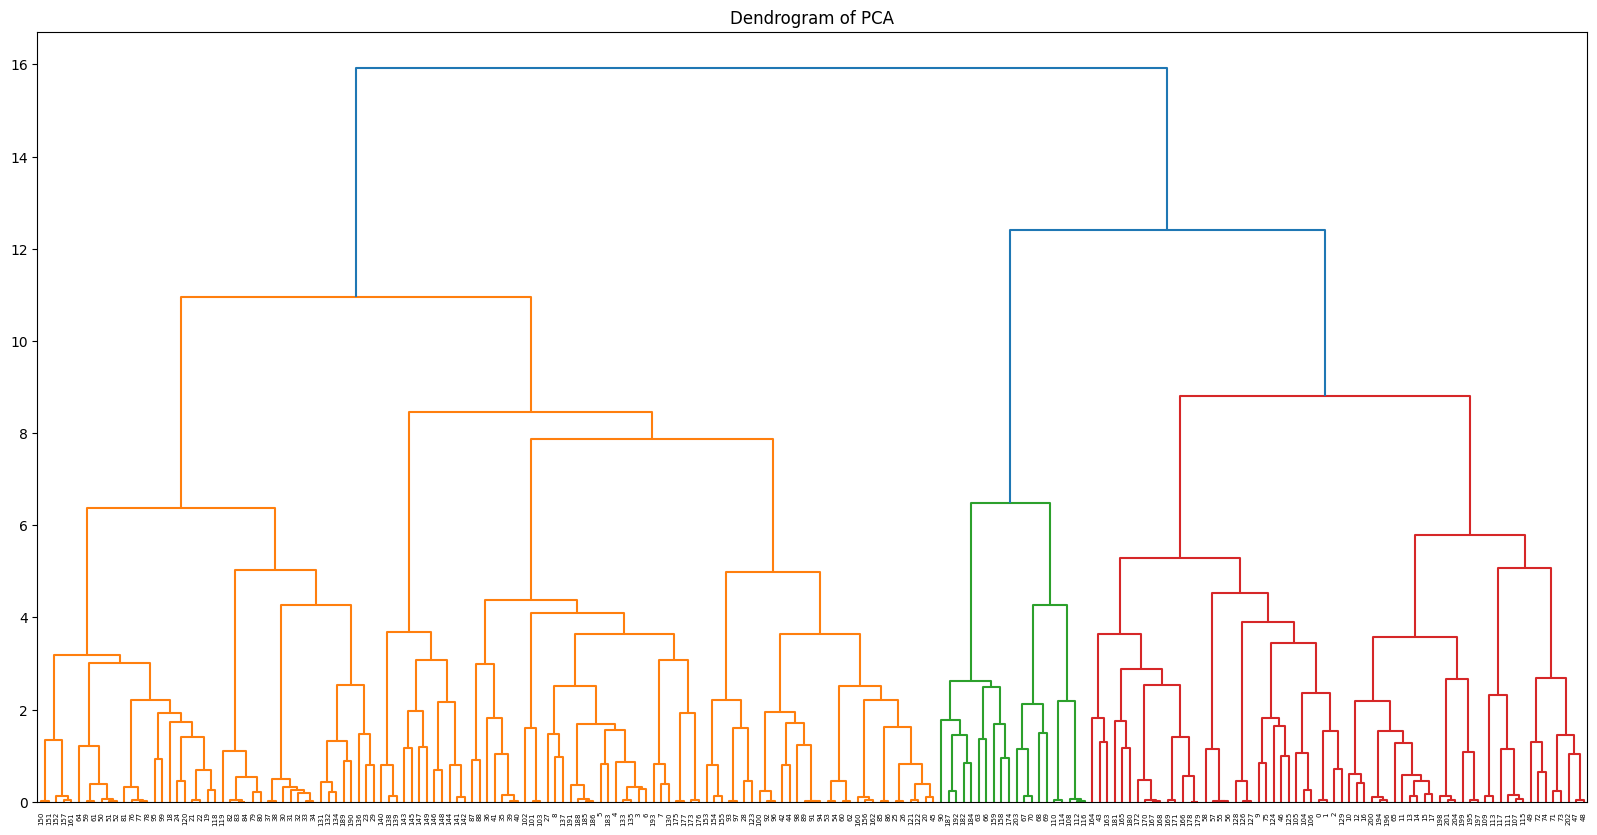

In [30]:
# 3.2 Agglomerative Clustering
# 3.2.1 PCA
# clustering with Agglomerative Clustering
# dendrogram
Z = linkage(df_pca.drop(columns='kmeans'), 'ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram of PCA')
plt.show()

In [31]:
# clustering
ac = AgglomerativeClustering(n_clusters=6, linkage='ward')
df_pca['ac'] = ac.fit_predict(df_pca.drop(columns=['kmeans']))
df_pca['ac'].value_counts()

ac
0    62
1    45
4    34
3    32
2    20
5    12
Name: count, dtype: int64

c:\Users\Y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


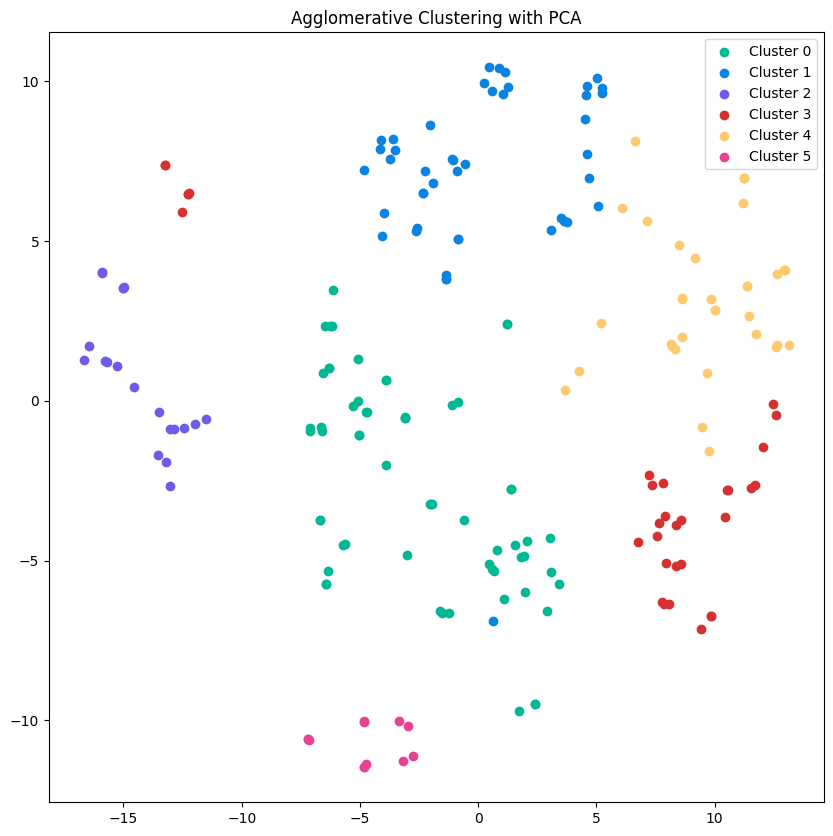

In [32]:
# evaluation
tsne_ac_pca = TSNE(n_components=2, random_state=random_state, perplexity=30, n_iter=1000).fit_transform(df_pca.drop(columns=['kmeans', 'ac']))
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.scatter(tsne_ac_pca[df_pca['ac'] == i, 0], tsne_ac_pca[df_pca['ac'] == i, 1], 
                color=plt_properties['color'][i % len(plt_properties['color'])], label=f'Cluster {i}')
plt.title('Agglomerative Clustering with PCA')
plt.legend()
plt.show()

In [33]:
silhouette_score_ac_pca = silhouette_score(df_pca.drop(columns=['kmeans','ac']), df_pca['ac'])
calinski_harabasz_score_ac_pca = calinski_harabasz_score(df_pca.drop(columns=['kmeans','ac']), df_pca['ac'])
davies_bouldin_score_ac_pca = davies_bouldin_score(df_pca.drop(columns=['kmeans','ac']), df_pca['ac'])
print(f'Silhouette score: {silhouette_score_ac_pca}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score_ac_pca}')
print(f'Davies-Bouldin score: {davies_bouldin_score_ac_pca}')

Silhouette score: 0.2190972298198826
Calinski-Harabasz score: 36.2533457240891
Davies-Bouldin score: 1.5839294523536573


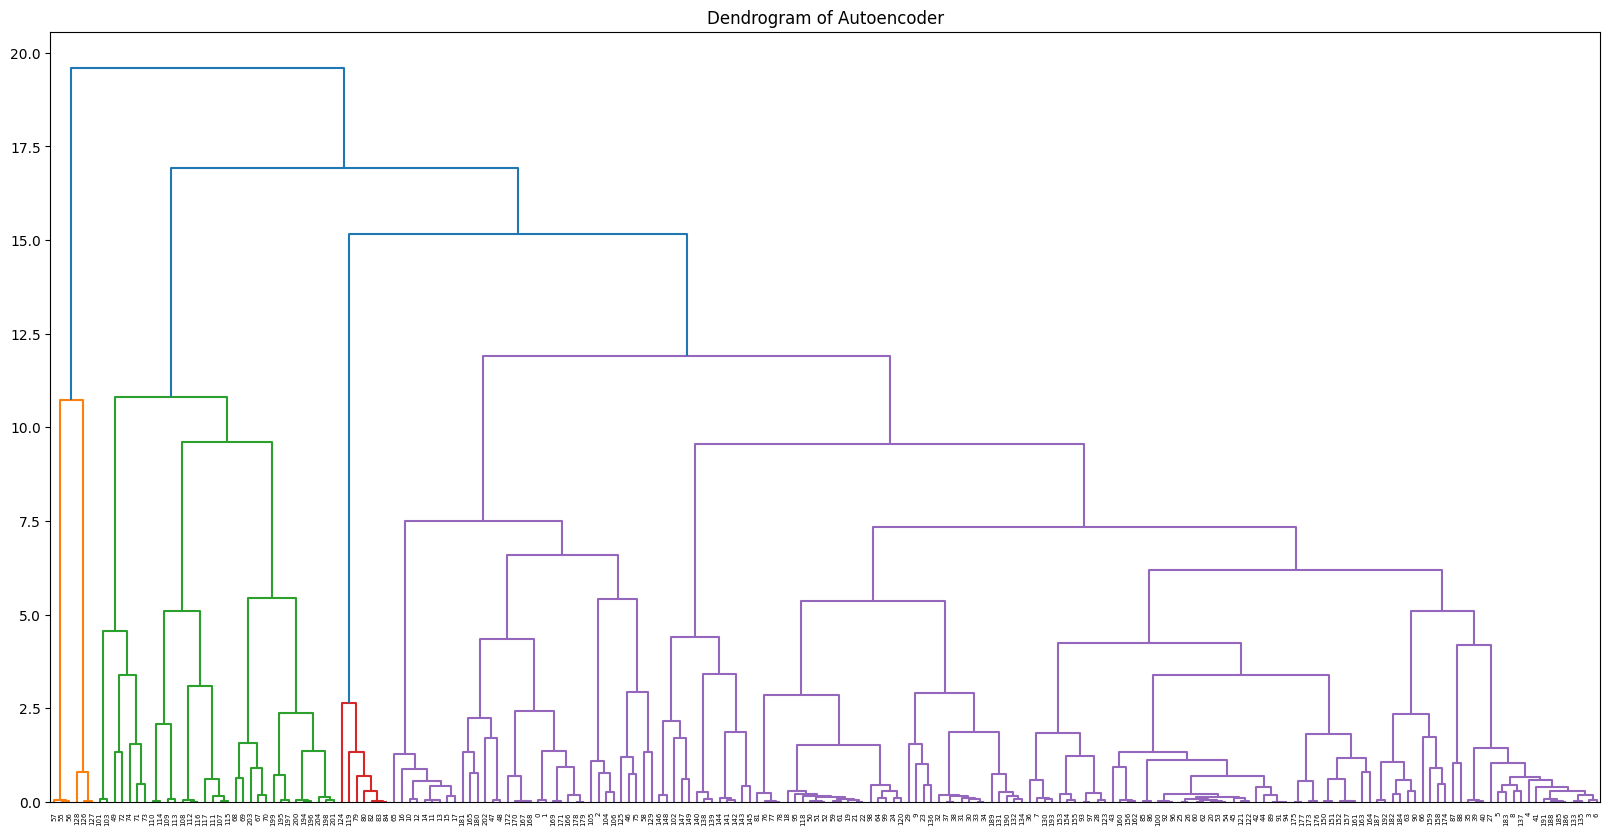

In [34]:
# clustering with autoencoder
# dendrogram
Z = linkage(df_autoencoder.drop(columns='kmeans'), 'ward')
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram of Autoencoder')
plt.show()

In [35]:
# clustering
ac = AgglomerativeClustering(n_clusters=6, linkage='ward')
df_autoencoder['ac'] = ac.fit_predict(df_autoencoder.drop(columns=['kmeans']))
df_autoencoder['ac'].value_counts()

ac
2    125
4     35
1     25
5      7
3      7
0      6
Name: count, dtype: int64

c:\Users\Y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


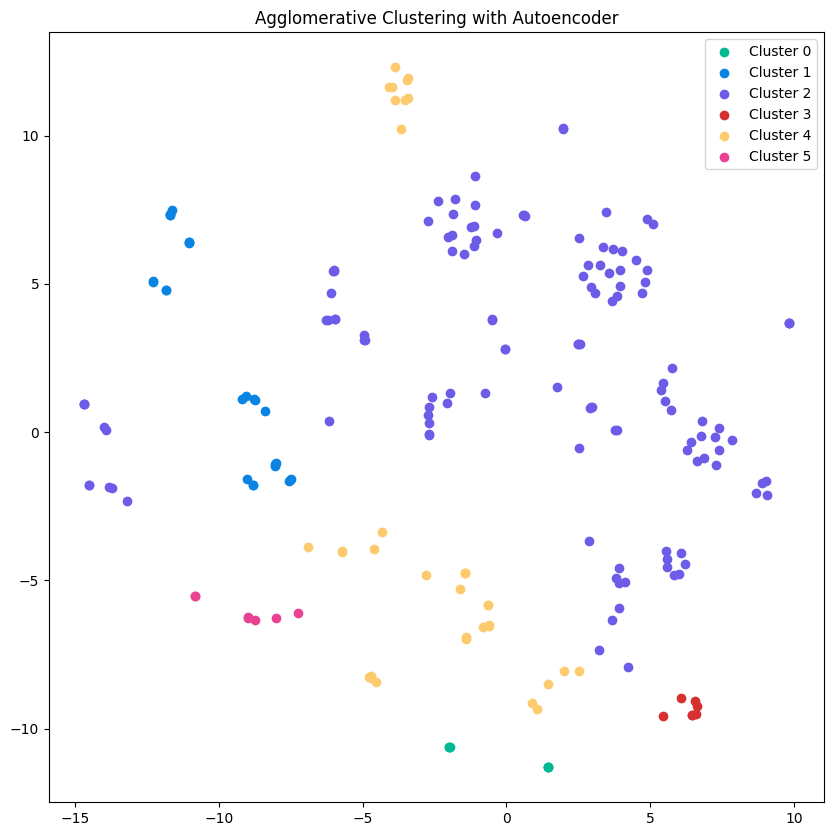

In [36]:
# evaluation
tsne_ac_autoencoder = TSNE(n_components=2, random_state=random_state, perplexity=30, n_iter=1000).fit_transform(df_autoencoder.drop(columns=['kmeans', 'ac']))
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.scatter(tsne_ac_autoencoder[df_autoencoder['ac'] == i, 0], tsne_ac_autoencoder[df_autoencoder['ac'] == i, 1], 
                color=plt_properties['color'][i % len(plt_properties['color'])], label=f'Cluster {i}')
plt.title('Agglomerative Clustering with Autoencoder')
plt.legend()
plt.show()

In [37]:
silhouette_score_ac_autoencoder = silhouette_score(df_autoencoder.drop(columns=['kmeans','ac']), df_autoencoder['ac'])
calinski_harabasz_score_ac_autoencoder = calinski_harabasz_score(df_autoencoder.drop(columns=['kmeans','ac']), df_autoencoder['ac'])
davies_bouldin_score_ac_autoencoder = davies_bouldin_score(df_autoencoder.drop(columns=['kmeans','ac']), df_autoencoder['ac'])
print(f'Silhouette score: {silhouette_score_ac_autoencoder}')
print(f'Calinski-Harabasz score: {calinski_harabasz_score_ac_autoencoder}')
print(f'Davies-Bouldin score: {davies_bouldin_score_ac_autoencoder}')

Silhouette score: 0.3201230764389038
Calinski-Harabasz score: 50.79264577908162
Davies-Bouldin score: 1.215321639909625


In [38]:
# 4